In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#setting dimension for plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [15]:
cars_data=pd.read_csv('C:/Users/Mansi/Downloads/cars_sampled.csv')

In [16]:
cars = cars_data.copy()

In [17]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [18]:
pd.set_option('display.float_format',lambda x: '%.3f' % x)# to see the summary of all the variables. 3 decimals 
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [19]:
# dropping unwanted columns
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col,axis=1)

In [20]:
# removing duplicate records
cars.drop_duplicates(keep='first',inplace=True)

In [21]:
#to find number of missing values
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [22]:
#  variable years of registration
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()
yearwise_count

1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

In [23]:
sum(cars['yearOfRegistration'] > 2018) #working range 1950 to 2018

26

In [24]:
sum(cars['yearOfRegistration'] < 1950)

38

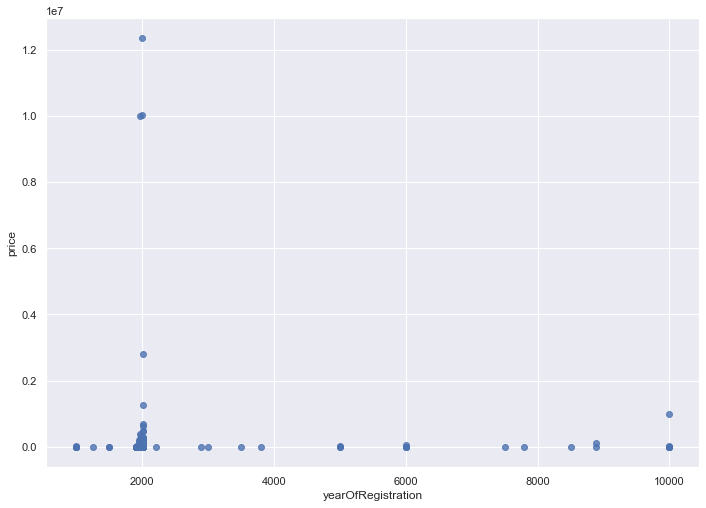

In [25]:
sns.regplot(x='yearOfRegistration',y='price',scatter=True,fit_reg=False,data=cars) # there are very high values which are 
                                                                                   # effecting the other points so we will 
                                                                                   # set the range

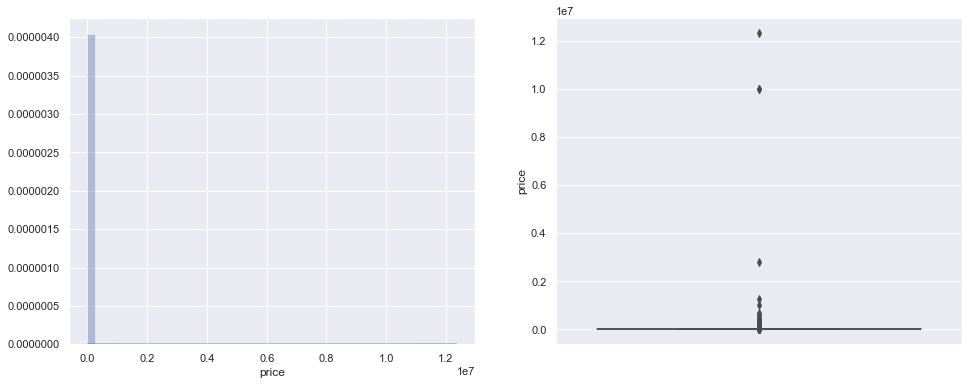

In [26]:
#   variable price
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(16,6))

sns.distplot(cars['price'],ax=axis1)
sns.boxplot(cars['price'],orient='v',ax=axis2) # there are many entries around zero so we will set the range

In [27]:
sum(cars['price'] > 150000) # working range 100 to 150000

34

In [28]:
sum(cars['price'] < 100)

1748

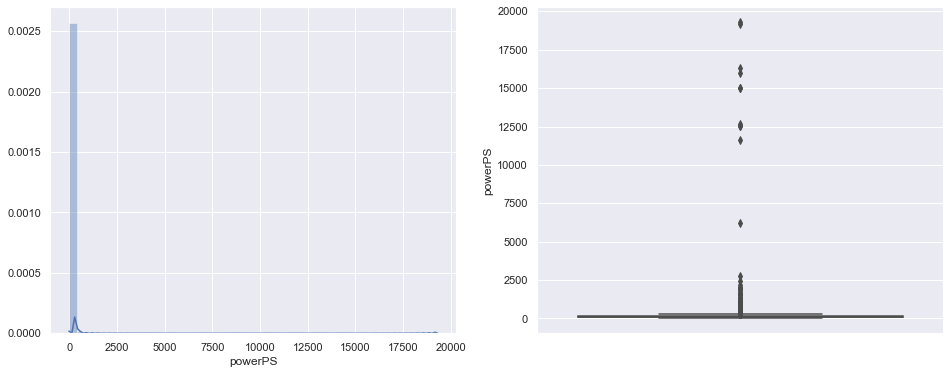

In [29]:
#   variable powerPS
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(16,6))

sns.distplot(cars['powerPS'],ax=axis1)
sns.boxplot(cars['powerPS'],orient='v',ax=axis2) # many entries are near to zero so we will set the range

In [30]:
sum(cars['powerPS'] > 500) # working range from 10 to 500

115

In [31]:
sum(cars['powerPS'] < 10)

5565

### Working Range of Data

In [32]:
cars = cars[
         (cars.yearOfRegistration <= 2018)
       & (cars.yearOfRegistration >= 1950)
       & (cars.price >= 100)
       & (cars.price <=150000)
       & (cars.powerPS >= 10)
       & (cars.powerPS <= 500)] # 6700 records are dropped 

### Variable Reduction

In [33]:
# combining year of registration and month of registration
cars['monthOfRegistration']/=12

# creating new variable by adding yearOfRegistration and monthofregistration
cars['Age']= (2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [34]:
# dropping yearofregistration and monthof registration 
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'],axis=1)

## Visualising Parameters 

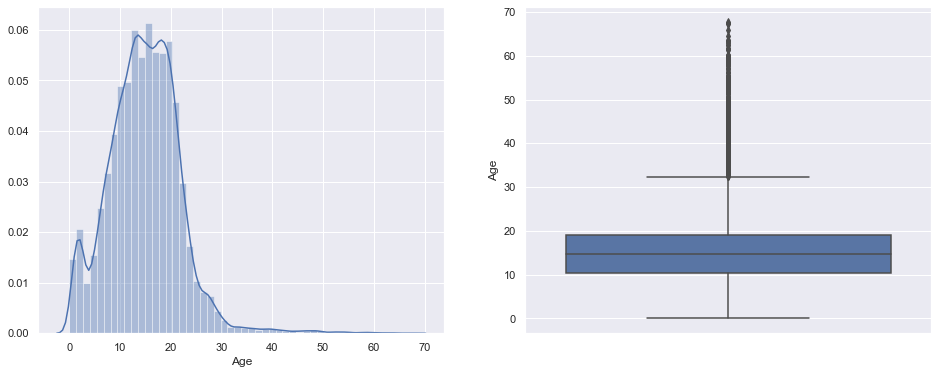

In [35]:
# age
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(16,6))

sns.distplot(cars['Age'],ax=axis1)
sns.boxplot(cars['Age'],orient='v',ax=axis2)

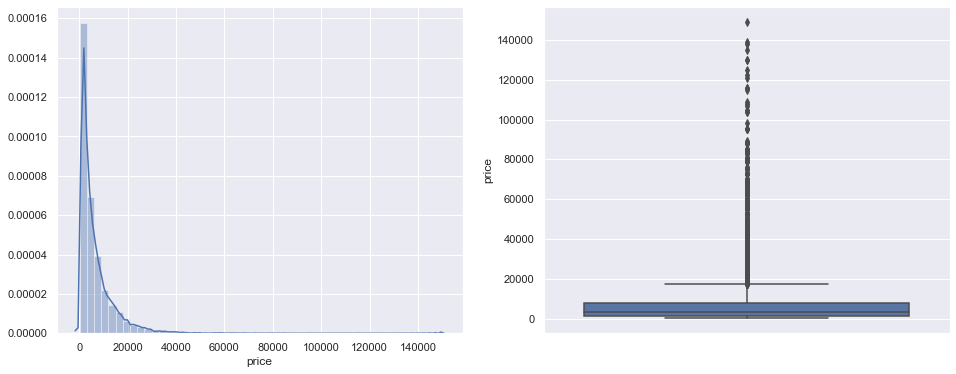

In [36]:
# price
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(16,6))
sns.distplot(cars['price'],ax=axis1)
sns.boxplot(cars['price'],orient='v',ax=axis2)

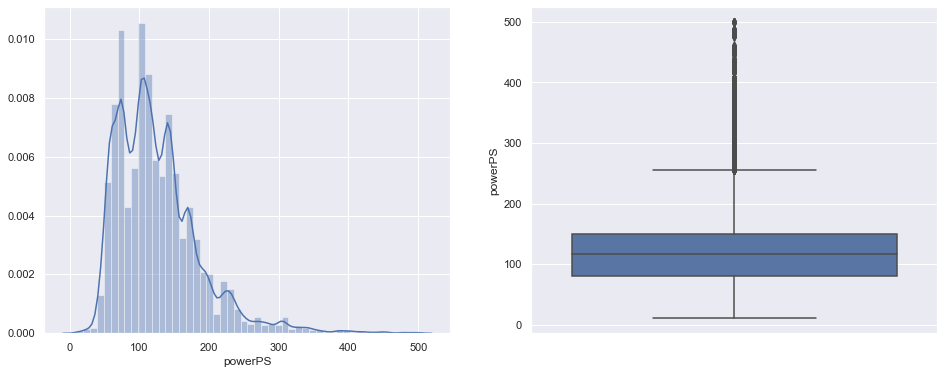

In [37]:
#powerPS
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(16,6))
sns.distplot(cars['powerPS'],ax=axis1)
sns.boxplot(cars['powerPS'],orient='v',ax=axis2)

### Visualising Parameters After Narrowing Working Range

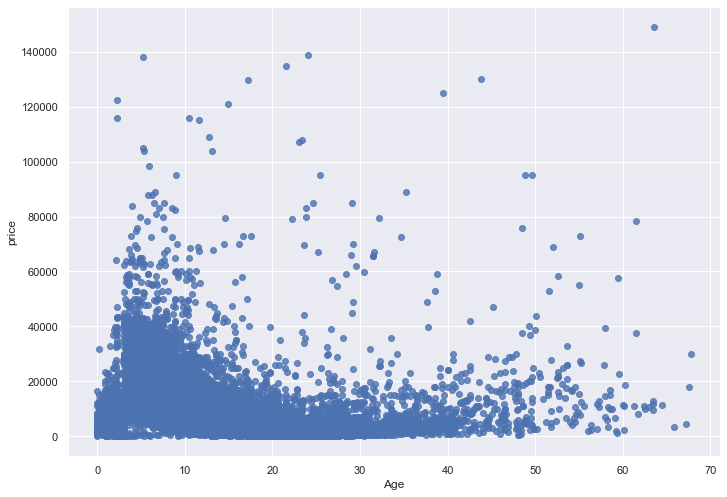

In [38]:
# age vs price
sns.regplot(x='Age',y='price',scatter=True,fit_reg=False,data=cars)
# with increase in age, price decreases

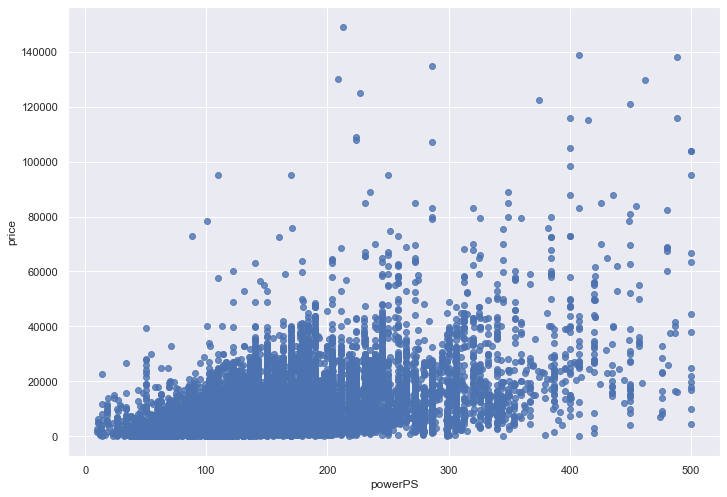

In [39]:
# powerPS vs price
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=False,data=cars)

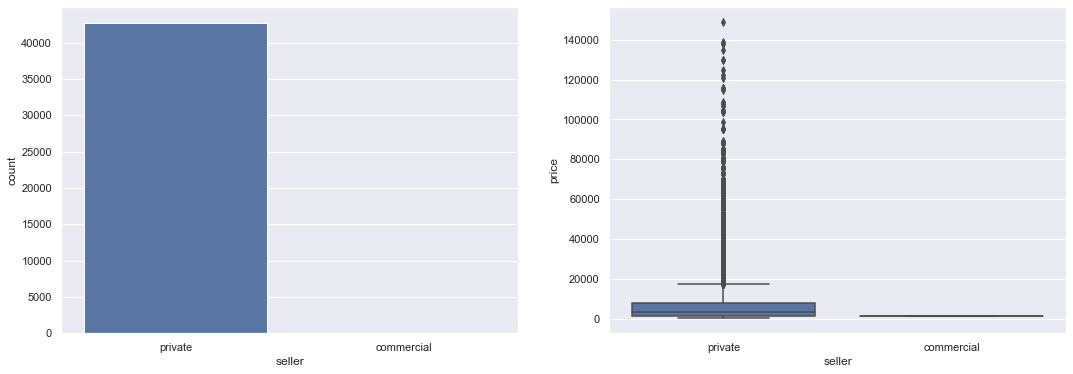

In [40]:
# variable seller
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(18,6))
sns.countplot(x='seller',data=cars,ax=axis1) 
sns.boxplot(x='seller',y='price',data=cars,ax=axis2) # fewer cars have offer => INSIGNIFICANT

In [41]:
# variable offertype
cars['offerType'].value_counts() # all types are offers => INSIGNIFICANT

offer    42772
Name: offerType, dtype: int64

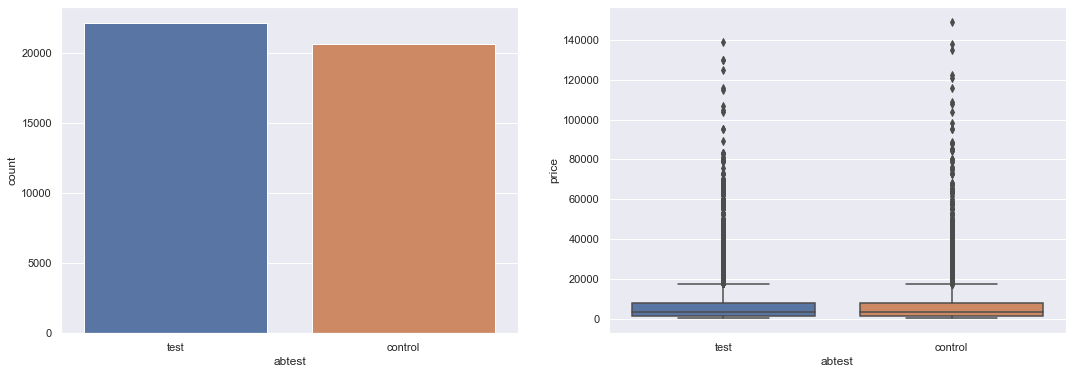

In [42]:
# variable abtest 
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(18,6))
sns.countplot(x='abtest',data=cars,ax=axis1) 
sns.boxplot(x='abtest',y='price',data=cars,ax=axis2) # equally distributed and does not effect price => INSIGNIFICANT


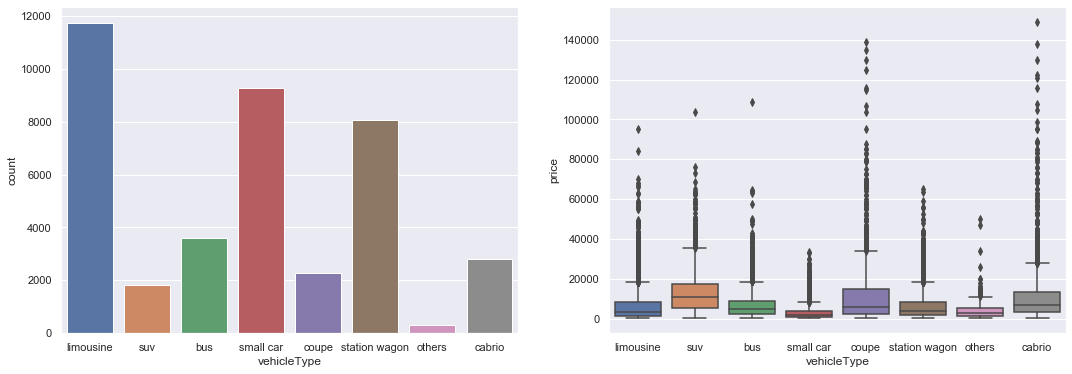

In [43]:
# variable  vehicletype
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(18,6))
sns.countplot(x='vehicleType',data=cars,ax=axis1) 
sns.boxplot(x='vehicleType',y='price',data=cars,ax=axis2) # 8 types cars - limousine,small cars and station wagons max freq 
                                                          # vehicle type effects price

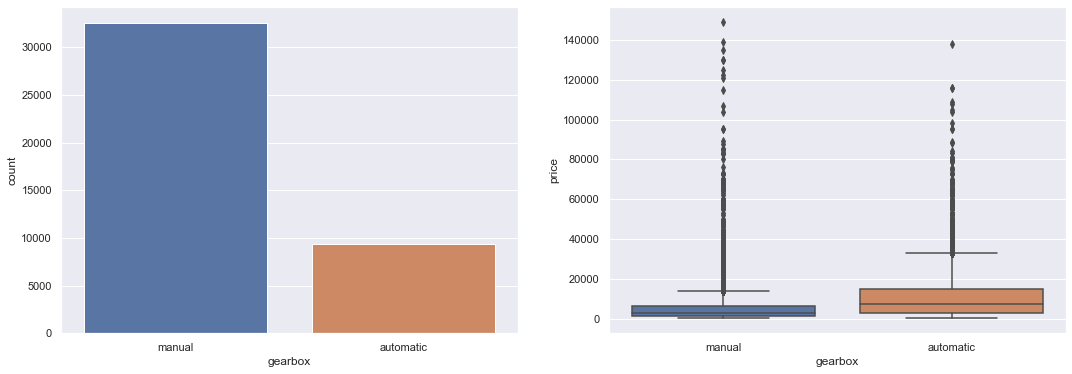

In [44]:
# variable gearbox
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(18,6))
sns.countplot(x='gearbox',data=cars,ax=axis1) 
sns.boxplot(x='gearbox',y='price',data=cars,ax=axis2) # gearbox effects price

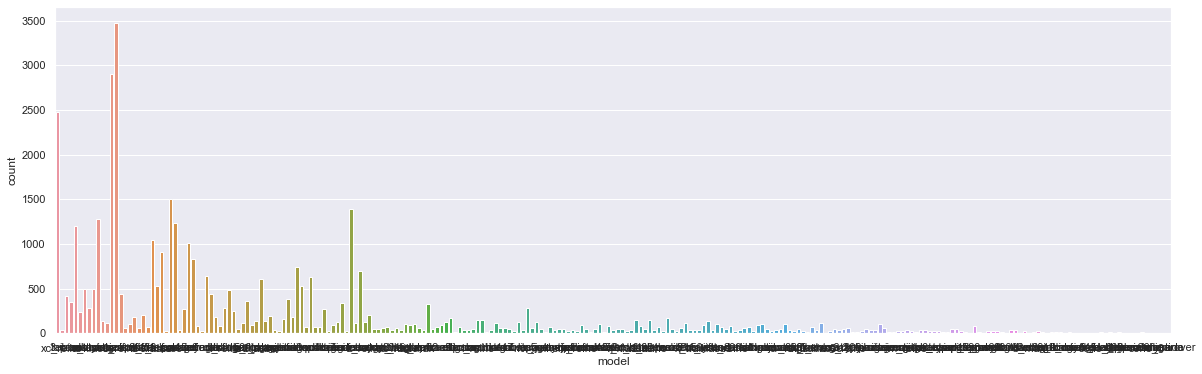

In [45]:
# variable model
fig, (axis1)=plt.subplots(figsize=(20,6))
sns.countplot(x='model',data=cars,ax=axis1) # cars are distributed under many models

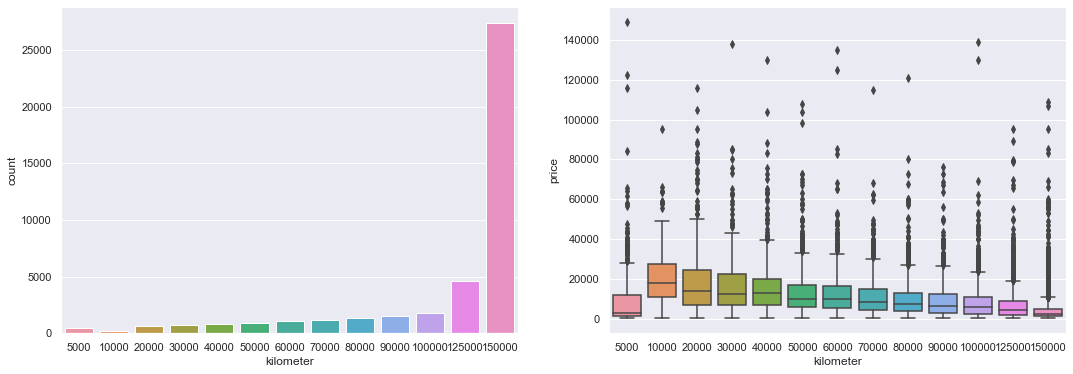

In [46]:
# variable kilometer
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(18,6))
sns.countplot(x='kilometer',data=cars,ax=axis1) # as the Kilometer is increasing the price of the car is decreasing
sns.boxplot(x='kilometer',y='price',data=cars,ax=axis2)

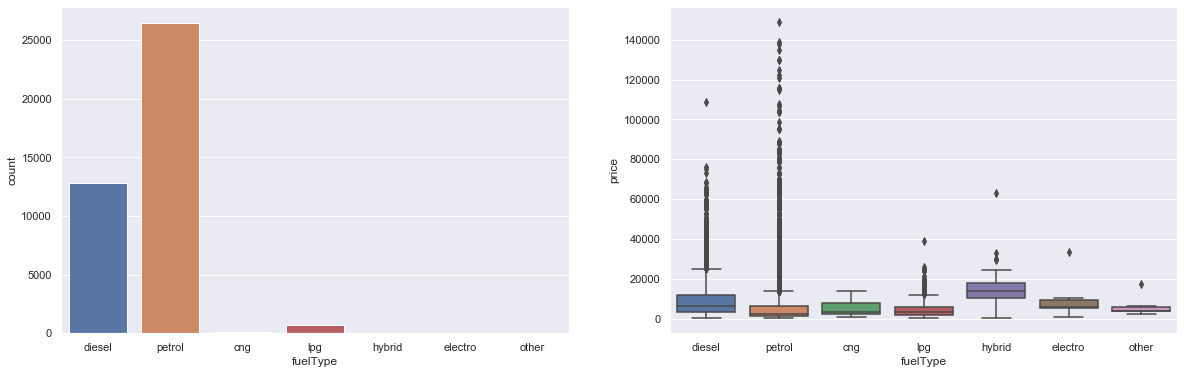

In [47]:
# variable fueltype
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(20,6))
sns.countplot(x='fuelType',data=cars,ax=axis1) 
sns.boxplot(x='fuelType',y='price',data=cars,ax=axis2) # fueltype effects price

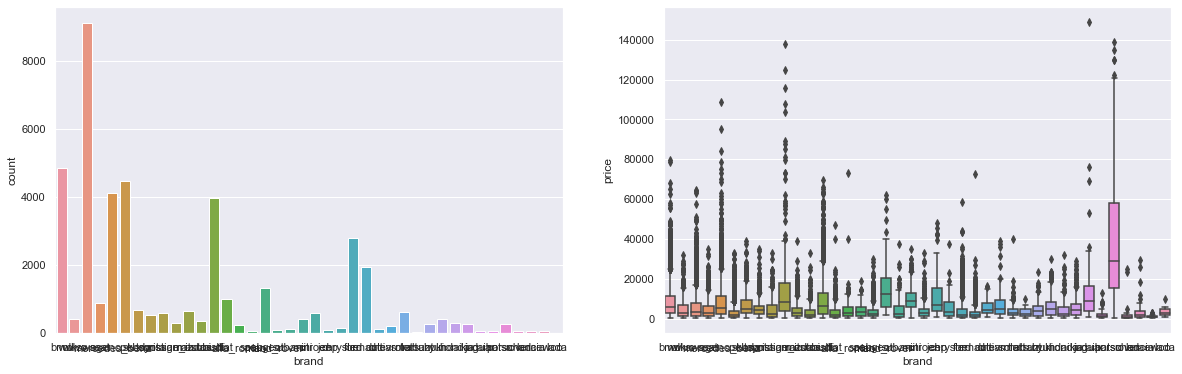

In [48]:
# variable brand
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(20,6))
sns.countplot(x='brand',data=cars,ax=axis1) 
sns.boxplot(x='brand',y='price',data=cars,ax=axis2)
# cars are distributed over many brands
# considered for modelling

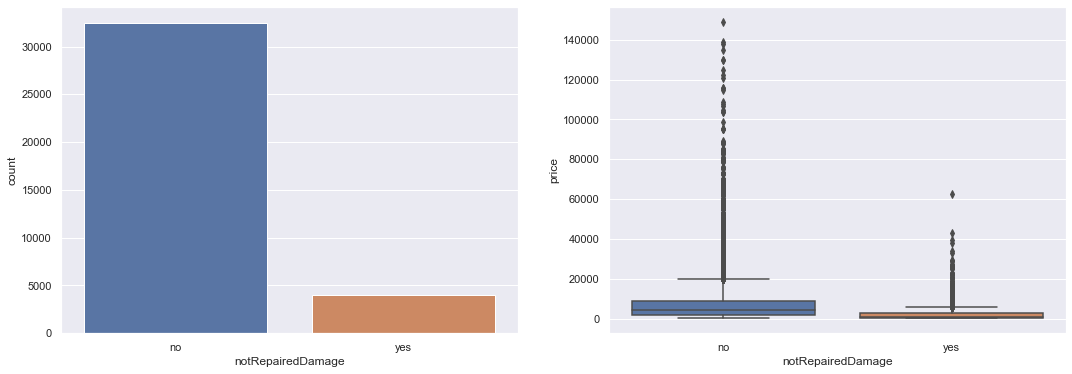

In [49]:
# variable notrepaireddamage
# yes - car was damaged but not rectified
# no - car was damaged but has been rectified
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(18,6))
sns.countplot(x='notRepairedDamage',data=cars,ax=axis1) 
sns.boxplot(x='notRepairedDamage',y='price',data=cars,ax=axis2)

In [50]:
# removing insigificant variables
col=['seller','offerType','abtest']
cars=cars.drop(columns=col,axis=1)
cars_copy=cars.copy()

In [51]:
# Correlation
cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### MODEL BUILDING WITH IMPUTED DATA

In [53]:
cars_imputed = cars.apply(lambda x:x.fillna(x.median()) \
                          if x.dtype=='float' else \
                              x.fillna(x.value_counts().index[0]))

In [54]:
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [55]:
# converting categorical variables into dummy variables
cars_imputed = pd.get_dummies(cars_imputed,drop_first=True)

In [56]:
# seperating input and output features
x2 = cars_imputed.drop(['price'],axis='columns',inplace=False )
y2 = cars_imputed['price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9E3A6E2C8>,
      dtype=object)

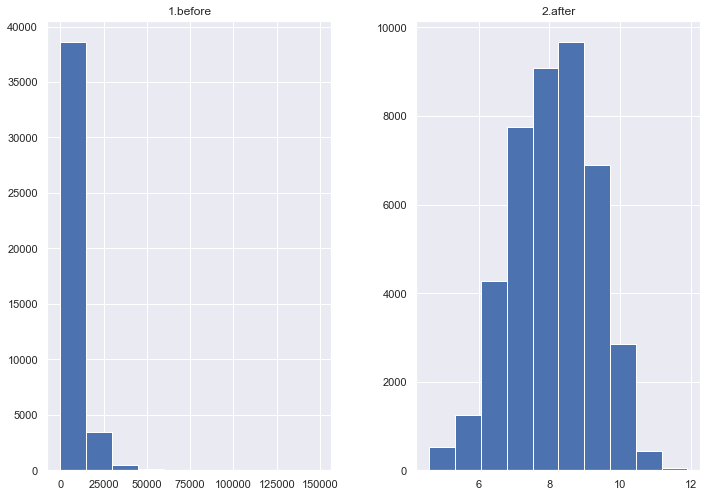

In [57]:
# plotting the variable price
prices = pd.DataFrame({'1.before':y2,'2.after':np.log(y2)})
prices.hist()

In [58]:
# transforming price as logarithmaic value
y2 = np.log(y2)

In [59]:
# splitting data into test and train
X_train,X_test,y_train,y_test = train_test_split(x2,y2,test_size=0.3,random_state=3)

In [60]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


### BASELINE MODEL FOR IMPUTED DATA

In [64]:
# We are making a base model by using test data mean value . This is to set a 
# benchmark and to compare with our regression model

# finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

8.068391740519193


In [66]:
# repeating same value till length of test data
base_pred = np.repeat(base_pred,len(y_test))

In [67]:
# finding RMSE
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test,base_pred))
print(base_root_mean_square_error)

1.1884349112889792


### LINEAR REGRESSION WITH IMPUTED DATA

In [68]:
# setting intercept as True
lgr = LinearRegression(fit_intercept=True)

# model
model_lin = lgr.fit(X_train,y_train)

# predicting model on test set
cars_prediction_lin = lgr.predict(X_test)

In [69]:
# computing MSE and RMSE
lin_mse = mean_squared_error(y_test,cars_prediction_lin)
lin_mse = np.sqrt(lin_mse)
print(lin_mse)

0.6483956449231307


In [70]:
# R squared value 
r1_lin_test = model_lin.score(X_test,y_test)
r1_lin_train = model_lin.score(X_train,y_train)
print(r1_lin_test,r1_lin_train)

0.7023339008631175 0.7071658736894363


### RANDOM FOREST WITH IMPUTED DATA

In [71]:
# model parameters
rf = RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=100,
                           min_samples_split=10,min_samples_leaf=4,random_state=1) 

# model
model_rf = rf.fit(X_train,y_train)

# predicting model on test set
cars_prediction_rf = rf.predict(X_test)

In [72]:
# computing MSE and RMSE
rf_mse = mean_squared_error(y_test,cars_prediction_rf)
rf_rmse = np.sqrt(rf_mse)
print(rf_rmse)

0.494313994408829


In [73]:
# R squared value 
r1_rf_test = model_rf.score(X_test,y_test)
r1_rf_train = model_rf.score(X_train,y_train)
print(r1_rf_test,r1_rf_train)

0.8269964521311131 0.9024289431669166


## Conclusion
### From the above two models we can see that Random Forest Model is working better than Linear Regression Model